<a href="https://colab.research.google.com/github/BeautifulTovarisch/statistics-potpourri/blob/main/basic_probability/basic_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Probability

This notebook explores basic _probability spaces_ each of which consists of:

- A _Sample Space_ ($\Omega$)
- A collection of _Events_
- A _Probabiliy Measure_, $P(\cdot)$

The following sections demonstrate various probability spaces.

In [1]:
import Pkg

Pkg.add("Plots")
Pkg.add("PyPlot")
Pkg.add("StatsBase")
Pkg.add("Combinatorics")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


## Rolling Fair Dice

The sample space of rolling two dice is the set of *ordered* pairs whose elements are the value of each die.

\begin{equation}
  \Omega = \{(i, j) : 1 \leqslant i,j \leqslant 6 \}
\end{equation}

Under these circumstances, the probability function is considered _symmetric_, since the probability of event $B$ is given by:

\begin{equation}
  P(B) = \frac{|B|}{|\Omega|}
\end{equation}

In other words, the probability of $B$ happening is proportional to how much of the sample space consists of the outcomes in $B$.

### Even Sum of Two Dice

This experiment computes the probability that the sum of the two dice rolls will be even. Since only two evens or two odds produce an even sum, we can count the number of pairs in each to provide a theoretical probability:

\begin{array}{cccccc}
  (1, 1) & (1, 3) & (1, 5) & (2, 2) & (2, 4) & (2, 6) \\
  (3, 1) & (3, 3) & (3, 5) & (4, 2) & (4, 4) & (4, 6) \\
  (5, 1) & (5, 3) & (5, 5) & (6, 2) & (6, 4) & (6, 6)
\end{array}

Mathematically this is denoted

\begin{equation}
  B = \{ (i, j) : \; (i + j) \; \text{is even} \}
\end{equation}

The following simluation computes $P(B)$ using a straightforward counting method and, slightly more subtly, a random experiment simulated by a Monte Carlo.

### Monte Carlo Simulation

This simluation actually models a random experiment with indicator variable corresponding to whether the sum of the faces is even:

\begin{align}
  X = \left\{
    \begin{array}{cc}
      1 & i + j \; \text{is even} \\
      0 & \text{otherwise}
    \end{array}
    \right.
\end{align}

The expected probability is then computed in the normal way:

\begin{equation}
  E(B) = \frac 1 N \sum_{k=0}^N X(b \in B)
\end{equation}

In [ ]:
"""
Two Dice - Monte Carlo

This simluation compares the actual computed value (combinatoric) to 1 million
iterations of dice rolls in a Monte Carlo simulation.
"""

N, faces = 10^6, 1:6

# Iterate through each pair and count whether the sum is even. This is the more
# straightforward way of literally counting the valid outcomes and dividing by
# the size of the sample space.
comb_outcomes = [(i, j) for i in faces for j in faces if iseven(i + j)]

# A more subtle way to compute the number of valid outcomes is to encode the
# Monte Carlo simulation with an indicator variable and compute the expected
# probability.
mc_prob = sum([iseven(rand(faces) + rand(faces)) for _ in 1:N]) / N

println("combinatorial: $(length(comb_outcomes) / length(faces)^2). Monte Carlo: $(mc_prob)")

## Matching Partial Passwords

Suppose a password is 8 characters consisting of upper and lowercase English letters and numbers 0-9. Then the total number of passwords is $62^8$. Assume an attacker has an equal likelihood of guessing a password, $62^{-8}$.

### Wrong Passwords

Now assume the security system creates a log anytime at least one character is matched by a guess. Let $A$ be the probability that an attacker guesses at least one correct character. Computing this probability is easier if we recognize that guessing at least one character is the complement of guessing 0 correct characters. To understand this, see that out of 62 possible characters, 61 are incorrect, hence we'd have to choose among the 61 incorrect characters 8 times in a row:

\begin{equation}
  61 \times 61 \times \dots \times 61 = 61^8 = |A^\complement|
\end{equation}

Now because we assume equal likelihood of guesses, we can compute $P(A^\complement)$ as

\begin{equation}
  P(A^\complement)
    = \frac{|A^\complement|}{|\Omega|}
    = \frac {61^8} {62^8}
    \approx 0.87802
\end{equation}

So we'd expect the probability of generating a log to be $1 - A^\complement \approx 0.12$. Once again we compute this with a direct counting method and with a Monte Carlo.

In [ ]:
"""
Password Partial Match

This simulation counts the number of password guesses that match at least one
character of the correct password against the total number of guesses.
"""

using Random

Random.seed!()

correctPassword = "3xyZu4Vn"

# Count the number of correct characters given a guess.
correctChars(guess) =
  sum([guess[i] == correctPassword[i] for i in 1:k])

# Monte Carlo, N = 10^7
# Guess N passwords and compute the proportion that correctly guess at least
# one character

N = 10^7
k = length(correctPassword)

allowedChars = [ 'a':'z' ; 'A':'Z' ; '0':'9' ]
passwords = [String(rand(allowedChars, k)) for _ in 1:N]

logs = sum([correctChars(guess) >= 1 for guess in passwords])

println("Logs generated: $(logs)")
println("Guesses generating logs: $(logs/N)")

## Birthday Paradox

The birthday paradox (not a true paradox) is the surprisingly high probability that two people of a given group share a birthday.

To model the situation for a group of $n$ people, we see that there are $365$ possible birthdaysfor each of the $n$ people, hence $\Omega = 365^n$.Let event $A$ be the event that two people share the same birthday. We want to compute $P(A)$.

### Analysis

It's easier to reason about $P(A^\complement)$ and use this value to compute $P(A)$. $A^\complement$ is the event that _no two people_ share a birthday.

The sequence of choices for each birthday is:

\begin{equation}
  |A^\complement|
    = 365 \times 364 \times \dots \times 365-(n-1)
    = \frac {365!} {(365-n)!}
\end{equation}

Since each additonal person reduces the number of choices for birthday by 1. So then, assuming each birthday is equally likely (not true in real life), we get:

\begin{equation}
  P(A^\complement)
    = \frac {|A^\complement|} {365^n}
\end{equation}

And so $P(A) = 1 - \frac {|A^\complement|} {365^n}$.

maximum error: 2.461172365062727820892938546467205715971256384764337390231064159958270652057059e-16


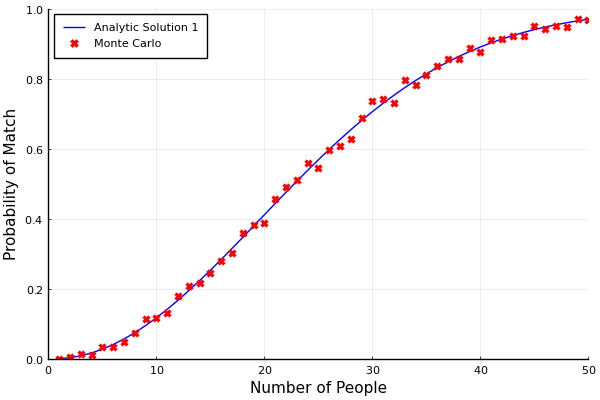

sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
sys:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [8]:
"""
Birthday Paradox

This simulation uses the Combinatorial package to approximate the probability of
any two of `n <= 50` people sharing a birthday. Two numerical methods are given.
"""

using StatsBase, Combinatorics, Plots; pyplot()

N = 10^3
xGrid = 1:50

# I assume we do the division inside the loop to avoid overflow
match1(n) = 1 - prod([k/365 for k in 365:-1:365-n+1])
match2(n) = 1 - factorial(365, 365-big(n)) / 365^big(n)

# Simulate at least one matching birthday. This is also a Bernoulli
function bdEvent(n)
  bDays = rand(1:365, n)
  hist = counts(bDays, 1:365)

  return maximum(hist) > 1
end

mc_prob(n) = sum([bdEvent(n) for _ in 1:N]) / N

# The rest of the code is for generating the plot
mc_approx = [mc_prob(n) for n in xGrid]

# Compare the two approaches
soln1 = [match1(n) for n in xGrid]
soln2 = [match2(n) for n in xGrid]

println("maximum error: $(maximum(abs.(soln1 - soln2)))")

plot(xGrid, soln1, c=:blue, label="Analytic Solution 1")
# plot(xGrid, soln2, c=:green, label="Analytic Solution 2")
scatter!(xGrid, mc_approx,
  ms=6, msw=0,
  c=:red, shape=:xcross,
  label="Monte Carlo", xlims=(0, 50), ylims=(0, 1),
  xlabel="Number of People",
  ylabel="Probability of Match",
  legend=:topleft)